In [341]:
import glob
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

from sklearn import metrics 
import IPython.display as ipd
from keras.utils import np_utils
from keras.utils import to_categorical

from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [359]:
df = pd.read_csv(r'D:\Datasets\Urban\Train\Train.csv')
df.dropna

<bound method DataFrame.dropna of         ID             Class
0        0             siren
1        1      street_music
2        2          drilling
3        3             siren
4        4          dog_bark
5        6  children_playing
6       10      street_music
7       11          drilling
8       12          gun_shot
9       15          dog_bark
10      17     engine_idling
11      18             siren
12      19          gun_shot
13      20     engine_idling
14      22   air_conditioner
15      24   air_conditioner
16      26     engine_idling
17      27             siren
18      32  children_playing
19      33        jackhammer
20      35          gun_shot
21      36             siren
22      37        jackhammer
23      38      street_music
24      40        jackhammer
25      42     engine_idling
26      43             siren
27      44  children_playing
28      45        jackhammer
29      46     engine_idling
...    ...               ...
5405  8691      street_music
5406  869

Class:  engine_idling
Sampling Rate:  22050 Hz
Duration:  4.0
Number of samples:  88200


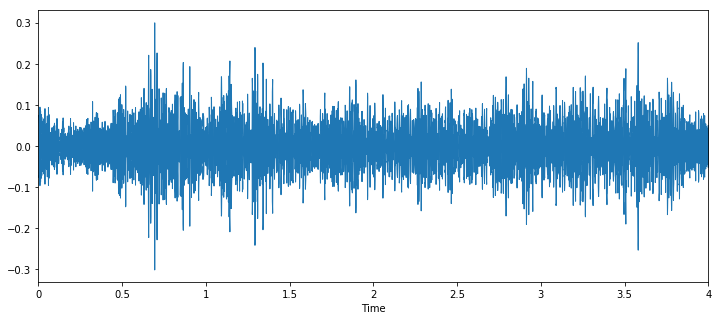

In [501]:
import random
import librosa.display

y, sr = librosa.load('D:/Datasets/Urban/train/Train/540.wav')
plt.figure(figsize=(12,5))
librosa.display.waveplot(y,sr);
print('Class: ', df.Class[540])
print('Sampling Rate: ',sr,'Hz')
print('Duration: ',len(y)/sr)
print('Number of samples: ', len(y))
ipd.Audio(data=y, rate=sr)

In [495]:
r'D:/Datasets/Urban/train/Train/' + str(df.ID[i]) + ".wav"

'D:/Datasets/Urban/train/Train/3179.wav'

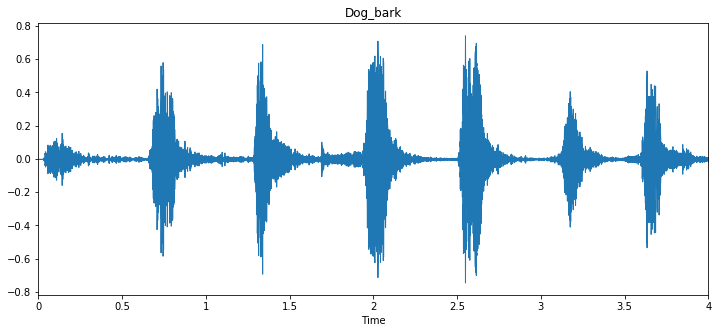

In [477]:
y, sr = librosa.load('D:/Datasets/Urban/train/Train/68.wav')
plt.figure(figsize=(12,5))
librosa.display.waveplot(y,sr);
plt.title('Dog_bark')
ipd.Audio(data=y, rate=sr)

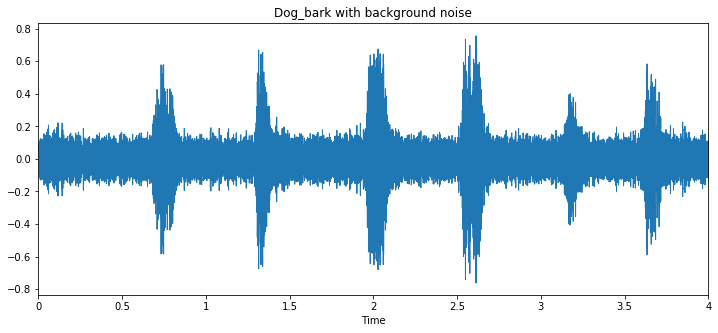

In [478]:
plt.figure(figsize=(12,5))
noise = np.random.randn(len(y))
data_noise = y + 0.05 * noise
librosa.display.waveplot(data_noise,sr);
plt.title('Dog_bark with background noise')
ipd.Audio(data=data_noise, rate=sr)

In [ ]:
##PArt 2

In [14]:
##Now let us see how we can leverage the concepts we learned above to solve the problem. We will follow these steps to solve the problem.

#Step 1: Load audio files
#Step 2: Extract features from audio
#Step 3: Convert the data to pass it in our deep learning model
#Step 4: Run a deep learning model and get results

In [145]:
D = []
for filename in  glob.glob(r'D:\Datasets\Urban\train\Train\*.wav' , recursive=True):
    D.append(filename)

1058

In [161]:
features, labels = np.empty((0,193)), np.empty(0)
for file_name in range(len(D)):
    try:
        
        X, sample_rate = librosa.load(D[file_name])
        stft = np.abs(librosa.stft(X))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
    except Exception as e:
        print ("Error encountered while parsing file: ", D[file_name])
        continue
    ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
    features = np.vstack([features,ext_features])
    labels = np.append(labels,int(D[file_name].split('\\')[-1].split('.')[0]))


Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1003.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\101.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1017.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1021.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1024.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1030.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1034.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1036.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1038.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1040.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\105.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1061.wav


C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1079.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1082.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1085.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1091.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1098.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1118.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\113.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1134.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1137.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1139.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\114.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1143.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1561.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1565.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1570.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1573.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1586.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1588.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1591.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1597.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1601.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1607.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1608.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1612.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1999.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2000.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2013.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2018.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2023.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2025.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2026.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2031.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2047.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2049.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2051.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2066.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2480.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2494.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2499.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2501.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2503.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2506.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2507.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\251.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2510.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2511.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2515.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2516.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\295.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2954.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2955.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2959.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2960.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2961.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2962.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2966.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2969.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2971.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2972.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2974.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3420.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3423.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3429.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\343.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3432.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3437.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3439.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3442.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3443.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3446.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3453.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3458.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3834.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3836.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3839.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3840.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3843.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3844.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3846.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3848.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3850.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3854.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3855.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3859.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4267.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4272.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4273.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4274.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4285.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4289.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4291.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4293.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4303.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4311.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4316.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4320.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4775.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4776.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4783.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4785.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4786.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4787.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4789.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\480.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4801.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4805.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4807.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4826.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5223.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5227.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5234.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\524.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5243.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5247.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5248.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\525.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5255.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5259.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5263.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5264.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5719.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5724.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5732.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5733.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5736.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5746.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5751.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5755.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5757.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5758.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5762.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5763.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6211.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6214.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6217.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6219.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\622.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6220.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6222.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6227.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\623.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6232.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6239.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6248.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6662.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6664.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6667.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6668.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6671.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6674.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6677.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6698.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6710.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6726.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6728.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6731.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7138.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7142.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7144.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7150.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7155.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7156.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7162.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7170.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7172.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7178.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7180.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\719.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7618.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7636.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7650.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7653.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7655.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7656.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\766.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7664.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7665.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7669.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7671.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7680.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\811.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8110.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8111.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8119.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8127.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8128.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8130.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8133.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8143.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8144.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8152.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8154.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\859.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8598.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8603.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8610.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8614.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8616.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8617.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8637.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\865.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8651.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8654.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8660.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

In [210]:
features = np.array(features)
labels = np.array(labels, dtype = np.int)

In [163]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [371]:
print(df[df["ID"].isnull()])
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')
df = df.dropna(subset=['ID'])
df['ID'] = df['ID'].astype(int)


dt =  [df.loc[labels]]
dt = dt[0].Class.values

Empty DataFrame
Columns: [ID, Class]
Index: []


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [385]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dt.astype(str))
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[ 9 10  5 ...  0  9 10]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [393]:
from sklearn.model_selection import train_test_split

#spliting of array to train and test samples
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    onehot_encoded, 
                                                    test_size=0.30, 
                                                    random_state=42)
#shapes are displayed of repective arrays
print (x_train.shape,
       y_train.shape)
print (x_test.shape,
       y_test.shape)

(2569, 193) (2569, 11)
(1101, 193) (1101, 11)


In [466]:
colnum = x_train.shape[1]


model = Sequential()
model.add(Dense(150, activation='relu', input_shape=(colnum,)))
model.add(Dense(100, activation='relu', input_shape=(colnum,)))
model.add(Dense(50, activation='relu', input_shape=(colnum,)))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)
score = model.evaluate(x_test, y_test, verbose=0)*100
score[1]
history = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
2569/2569 [==============================] - 2s 860us/step - loss: 3.9799 - acc: 0.2581
Epoch 2/100
2569/2569 [==============================] - 0s 147us/step - loss: 2.4589 - acc: 0.3519
Epoch 3/100
2569/2569 [==============================] - 0s 146us/step - loss: 2.2937 - acc: 0.3737
Epoch 4/100
2569/2569 [==============================] - 0s 150us/step - loss: 2.2341 - acc: 0.3830
Epoch 5/100
2569/2569 [==============================] - 0s 148us/step - loss: 2.1883 - acc: 0.3951
Epoch 6/100
2569/2569 [==============================] - 0s 147us/step - loss: 2.1535 - acc: 0.3986
Epoch 7/100
2569/2569 [==============================] - 0s 147us/step - loss: 2.1066 - acc: 0.4033
Epoch 8/100
2569/2569 [==============================] - 0s 151us/step - loss: 2.0965 - acc: 0.4056
Epoch 9/100
2569/2569 [==============================] - 0s 149us/step - loss: 2.0674 - acc: 0.4079
Epoch 10/100
2569/2569 [==============================] - 0s 158us/step - loss: 2.0514 - acc: 0.4025

Epoch 82/100
2569/2569 [==============================] - 0s 168us/step - loss: 1.1476 - acc: 0.6501
Epoch 83/100
2569/2569 [==============================] - 0s 161us/step - loss: 1.1381 - acc: 0.6349
Epoch 84/100
2569/2569 [==============================] - 0s 165us/step - loss: 1.1325 - acc: 0.6458
Epoch 85/100
2569/2569 [==============================] - 0s 161us/step - loss: 1.1335 - acc: 0.6466
Epoch 86/100
2569/2569 [==============================] - 0s 175us/step - loss: 1.1188 - acc: 0.6598
Epoch 87/100
2569/2569 [==============================] - 1s 237us/step - loss: 1.1302 - acc: 0.6559
Epoch 88/100
2569/2569 [==============================] - 1s 206us/step - loss: 1.1449 - acc: 0.6450
Epoch 89/100
2569/2569 [==============================] - 0s 159us/step - loss: 1.1330 - acc: 0.6454
Epoch 90/100
2569/2569 [==============================] - 0s 170us/step - loss: 1.0688 - acc: 0.6668
Epoch 91/100
2569/2569 [==============================] - 0s 163us/step - loss: 1.0649 - ac

2569/2569 [==============================] - 1s 200us/step - loss: 0.6652 - acc: 0.8093
Epoch 63/100
2569/2569 [==============================] - 0s 179us/step - loss: 0.6524 - acc: 0.8112
Epoch 64/100
2569/2569 [==============================] - 0s 186us/step - loss: 0.6557 - acc: 0.8069
Epoch 65/100
2569/2569 [==============================] - 0s 177us/step - loss: 0.6510 - acc: 0.8139
Epoch 66/100
2569/2569 [==============================] - 0s 184us/step - loss: 0.6330 - acc: 0.8132
Epoch 67/100
2569/2569 [==============================] - 0s 186us/step - loss: 0.6438 - acc: 0.8112
Epoch 68/100
2569/2569 [==============================] - 0s 193us/step - loss: 0.6297 - acc: 0.8213
Epoch 69/100
2569/2569 [==============================] - 0s 192us/step - loss: 0.6321 - acc: 0.8198
Epoch 70/100
2569/2569 [==============================] - 1s 198us/step - loss: 0.6434 - acc: 0.8151
Epoch 71/100
2569/2569 [==============================] - 1s 203us/step - loss: 0.6435 - acc: 0.8077
Epo